#Linear Regression Model for housing price prediction
1. Linear Regression (with normal equation and iterative optimization)
2. Polynomial Regression
3. Regularized Regression models - Ridge and Lasso

We will set regularization rate and polynomial degree with hyperparameter tuning and cross validation.  

We will compare different models in terms of their parameter vectors and mean absolute error or train, development and test sets.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import loguniform
from scipy.stats import uniform

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline

#Common Set-up
set up random seed to a number of your chaice.

In [ ]:
np.random.seed(306)

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

#Data Loadnig and Splitting

In [ ]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)

train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels, random_state=42)


#Linear Regression with Normal Equation

Pipeline - 
* for fearure scaling
* linear regression on the transformed feature matrix

In [ ]:
lin_reg_pipeline = Pipeline([('feature_scaling', StandardScaler()),
                             ('lin_reg', LinearRegression())
                             ])
lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True,
                                    return_estimator=True
                                    )

lin_reg_train_error = -1 * lin_reg_cv_results['train_score']
lin_reg_test_error = -1 * lin_reg_cv_results['test_score']

print(f'Mean absolute error of linear regression model on the train set:\n {lin_reg_train_error.mean():0.3f} +/- {lin_reg_train_error.std():0.3f}')
print(f'Mean absolute error of linear regression model on the development set:\n {lin_reg_test_error.mean():0.3f} +/- {lin_reg_test_error.std():0.3f}')

Mean absolute error of linear regression model on the train set:
 0.530 +/- 0.002
Mean absolute error of linear regression model on the development set:
 0.527 +/- 0.008


Both train and test error anre close by, but are not low. This points to underfitting.

#Linear Regression with SGDRegressor

Pipeline - 
* for fearure scaling
* SGD regression on the transformed feature matrix

In [ ]:
sgd_reg_pipeline = Pipeline([('feature_scaling', StandardScaler()),
                             ('sgd_reg', SGDRegressor(max_iter=np.ceil(1e6/com_train_features.shape[0]),
                                                      #eraly_stopping=True,
                                                      eta0=1e-4,
                                                      learning_rate='constant',
                                                      tol=1e-5,
                                                      validation_fraction=0.1,
                                                      n_iter_no_change=5,
                                                      average=10,                                                   
                                                      random_state=42
                                                      ))
                             ]) 
sgd_reg_cv_results = cross_validate(sgd_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True,
                                    return_estimator=True
                                    )


sgd_reg_train_error = -1 * sgd_reg_cv_results['train_score']
sgd_reg_test_error = -1 * sgd_reg_cv_results['test_score']

print(f'Mean absolute error of SGD regression model on the train set:\n {sgd_reg_train_error.mean():0.3f} +/- {sgd_reg_train_error.std():0.3f}')
print(f'Mean absolute error of SGD regression model on the development set:\n {sgd_reg_test_error.mean():0.3f} +/- {sgd_reg_test_error.std():0.3f}')

Mean absolute error of SGD regression model on the train set:
 0.529 +/- 0.003
Mean absolute error of SGD regression model on the development set:
 0.525 +/- 0.008


#Polynomial Regression
We will use validation curve to find right degree to use for polynomial models.

In [ ]:
poly_reg_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                             ('feature_scaling', StandardScaler()),
                             ('lin_reg', LinearRegression())
                             ])
poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True,
                                    return_estimator=True
                                    )

poly_reg_train_error = -1 * poly_reg_cv_results['train_score']
poly_reg_test_error = -1 * poly_reg_cv_results['test_score']

print(f'Mean absolute error of Polynomial regression model on the train set:\n {poly_reg_train_error.mean():0.3f} +/- {poly_reg_train_error.std():0.3f}')
print(f'Mean absolute error of Polynomial regression model on the development set:\n {poly_reg_test_error.mean():0.3f} +/- {poly_reg_test_error.std():0.3f}')

Mean absolute error of Polynomial regression model on the train set:
 0.461 +/- 0.003
Mean absolute error of Polynomial regression model on the development set:
 0.485 +/- 0.030


We will try using only interaction_features for PlynomialFeatures

In [ ]:
poly_reg_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2, interaction_only=True)),
                             ('feature_scaling', StandardScaler()),
                             ('lin_reg', LinearRegression())
                             ])
poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True,
                                    return_estimator=True
                                    )

poly_reg_train_error = -1 * poly_reg_cv_results['train_score']
poly_reg_test_error = -1 * poly_reg_cv_results['test_score']

print(f'Mean absolute error of Polynomial regression model on the train set:\n {poly_reg_train_error.mean():0.3f} +/- {poly_reg_train_error.std():0.3f}')
print(f'Mean absolute error of Polynomial regression model on the development set:\n {poly_reg_test_error.mean():0.3f} +/- {poly_reg_test_error.std():0.3f}')

Mean absolute error of Polynomial regression model on the train set:
 0.478 +/- 0.003
Mean absolute error of Polynomial regression model on the development set:
 0.497 +/- 0.024


Let us figure out which degree polynomial is best suited for this regression problem. For that we use validation_curve, which can be considered as a manual hyperparameter tuning

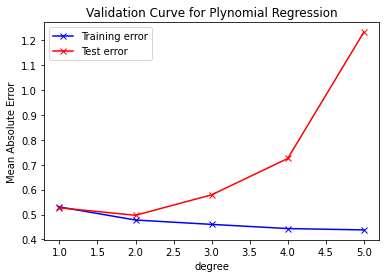

In [ ]:
degree = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(poly_reg_pipeline,
                                             com_train_features,
                                             com_train_labels,
                                             param_name='poly__degree',
                                             param_range=degree,
                                             cv=cv,
                                             scoring='neg_mean_absolute_error',
                                             n_jobs=2
                                             )
train_errors, test_errors = -train_scores, -test_scores

plt.plot(degree, train_errors.mean(axis=1),'b-x',label='Training error')
plt.plot(degree, test_errors.mean(axis=1),'r-x',label='Test error')
plt.legend()
plt.xlabel('degree')
plt.ylabel('Mean Absolute Error')
plt.title('Validation Curve for Plynomial Regression');

#Ridge Regression
The polynomial models have a tendency to overfit, if we use higher order polynomial features.  
We will use Ridge Regression which will penalizes for excessive model complexity in polynomial regression by adding regularization term. We use regularization term aplha=0.5and train regression model. Later we will use hyperparameter search for the right value of alpha such that it leads to the least cross validation errors

In [ ]:
ridge_reg_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                             ('feature_scaling', StandardScaler()),
                             ('ridge', Ridge(alpha=0.5))
                             ])
ridge_reg_cv_results = cross_validate(ridge_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True,
                                    return_estimator=True
                                    )

ridge_reg_train_error = -1 * ridge_reg_cv_results['train_score']
ridge_reg_test_error = -1 * ridge_reg_cv_results['test_score']

print(f'Mean absolute error of Ridge regression model on the train set:\n {ridge_reg_train_error.mean():0.3f} +/- {ridge_reg_train_error.std():0.3f}')
print(f'Mean absolute error of Ridge regression model on the development set:\n {ridge_reg_test_error.mean():0.3f} +/- {ridge_reg_test_error.std():0.3f}')

Mean absolute error of Ridge regression model on the train set:
 0.481 +/- 0.003
Mean absolute error of Ridge regression model on the development set:
 0.487 +/- 0.006


#HPT(HyperParameter Tuning) for Ridge Regularization rate

In [ ]:
alpha_list = np.logspace(-4, 0, num=20)

ridge_reg_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                             ('feature_scaling', StandardScaler()),
                             ('ridge_cv', RidgeCV(alphas=alpha_list,
                                             cv=cv,
                                             scoring='neg_mean_absolute_error'
                                             ))
                             ])
ridge_reg_cv_results = ridge_reg_pipeline.fit(com_train_features, com_train_labels)

print(f'The score with the best alpha is: {ridge_reg_cv_results[-1].best_score_:0.3f}')
print(f'The error with the best alpha is: {-ridge_reg_cv_results[-1].best_score_}')
print('The best value for alpha is: ', ridge_reg_cv_results[-1].alpha_)

The score with the best alpha is: -0.473
The error with the best alpha is: 0.47294070100741337
The best value for alpha is:  0.007847599703514606


#RidgeCV with cross validation

In [ ]:
ridge_cv_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                             ('feature_scaling', StandardScaler()),
                             ('ridge_cv', RidgeCV())
                             ])
ridgecv_cv_results = cross_validate(ridge_cv_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True,
                                    return_estimator=True
                                    )

ridge_cv_train_error = -1 * ridgecv_cv_results['train_score']
ridge_cv_test_error = -1 * ridgecv_cv_results['test_score']

print(f'Mean absolute error of Ridge regression model on the train set:\n {ridge_cv_train_error.mean():0.3f} +/- {ridge_cv_train_error.std():0.3f}')
print(f'Mean absolute error of Ridge regression model on the development set:\n {ridge_cv_test_error.mean():0.3f} +/- {ridge_cv_test_error.std():0.3f}')

print(ridgecv_cv_results)

Mean absolute error of Ridge regression model on the train set:
 0.487 +/- 0.015
Mean absolute error of Ridge regression model on the development set:
 0.492 +/- 0.013
{'fit_time': array([0.07410288, 0.068964  , 0.070755  , 0.0698421 , 0.07198238,
       0.08931518, 0.07441449, 0.07062316, 0.06640673, 0.07301378]), 'score_time': array([0.00603437, 0.00596476, 0.00639939, 0.0059607 , 0.0060215 ,
       0.00600719, 0.01006365, 0.00603056, 0.00592852, 0.00593638]), 'estimator': [Pipeline(steps=[('poly', PolynomialFeatures()),
                ('feature_scaling', StandardScaler()),
                ('ridge_cv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]), Pipeline(steps=[('poly', PolynomialFeatures()),
                ('feature_scaling', StandardScaler()),
                ('ridge_cv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]), Pipeline(steps=[('poly', PolynomialFeatures()),
                ('feature_scaling', StandardScaler()),
                ('ridge_cv', RidgeCV(alphas=array([ 0.1,  1.

#Ridgw HPT through GridSearchCV

In [ ]:
ridge_grid_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                             ('feature_scaling', StandardScaler()),
                             ('ridge', Ridge())
                             ])
param_grid = {'poly__degree': (1,2,3),
              'ridge__alpha' : np.logspace(-4,0,num=20)
              }
ridge_grid_search = GridSearchCV(ridge_grid_pipeline,
                                 param_grid=param_grid,
                                 n_jobs=2,
                                 cv=cv,
                                 scoring='neg_mean_absolute_error',
                                 return_train_score=True
                                 )
ridge_grid_search.fit(com_train_features, com_train_labels)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error')

ridge_grid_search.best_index_ gives us the index of the best parameter in the list

In [ ]:
mean_train_error = -1 * ridge_grid_search.cv_results_['mean_train_score'][ridge_grid_search.best_index_]
mean_test_error = -1 * ridge_grid_search.cv_results_['mean_test_score'][ridge_grid_search.best_index_]
std_train_error = -1 * ridge_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]
std_test_error = -1 * ridge_grid_search.cv_results_['std_test_score'][ridge_grid_search.best_index_]

print(f'Best mean absolute error on training set: {mean_train_error:0.3f} +/- {std_train_error:0.3f}')
print(f'Best mean absolute error on test set: {mean_test_error:0.3f} +/- {std_test_error:0.3f}')

Best mean absolute error on training set: 0.463 +/- -0.004
Best mean absolute error on test set: 0.474 +/- -0.015


In [ ]:
print('Mean cross validated score of the best estimator: ', ridge_grid_search.best_score_)
print('Mean cross validated error of the best estimator: ', -ridge_grid_search.best_score_)

Mean cross validated score of the best estimator:  -0.4738651176991914
Mean cross validated error of the best estimator:  0.4738651176991914


In [ ]:
print('The best parameter value is: ', ridge_grid_search.best_params_)

The best parameter value is:  {'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}


#Lasso Regression

##Baseline Model with fixed learning rate

In [ ]:
lasso_reg_pipeline = Pipeline([('poly', PolynomialFeatures()),
                               ("feature_scaling", StandardScaler()),
                               ('lasso', Lasso(alpha=0.01))
                               ])
lasso_reg_cv_results = cross_validate(lasso_reg_pipeline,
                                      com_train_features,
                                      com_train_labels,
                                      cv=cv,
                                      scoring='neg_mean_absolute_error',
                                      return_train_score=True,
                                      return_estimator=True
                                      )
lasso_reg_train_error = -1 * lasso_reg_cv_results['train_score']
lasso_reg_test_error = -1 * lasso_reg_cv_results['test_score']

print(f'Best mean absolute error on training set: {lasso_reg_train_error.mean():0.3f} +/- {lasso_reg_train_error.std():0.3f}')
print(f'Best mean absolute error on test set: {lasso_reg_test_error.mean():0.3f} +/- {lasso_reg_test_error.std():0.3f}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+01, tolerance: 1.654e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.109e+01, tolerance: 1.669e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Best mean absolute error on training set: 0.529 +/- 0.003
Best mean absolute error on test set: 0.528 +/- 0.008


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+01, tolerance: 1.658e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


#HPT for Lasso resularization rate

##with cross validation

##with GridSearchCV

In [ ]:
lasso_grid_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                             ('feature_scaling', StandardScaler()),
                             ('lasso', Lasso())
                             ])
param_grid = {'poly__degree': (1,2,3),
              'lasso__alpha' : np.logspace(-4,0,num=20)
              }
lasso_grid_search = GridSearchCV(lasso_grid_pipeline,
                                 param_grid=param_grid,
                                 n_jobs=2,
                                 cv=cv,
                                 scoring='neg_mean_absolute_error',
                                 return_train_score=True
                                 )
lasso_grid_search.fit(com_train_features, com_train_labels)

KeyboardInterrupt: ignored

In [ ]:
mean_train_error = -1 * lasso_grid_search.cv_results_['mean_train_score'][lasso_grid_search.best_index_]
mean_test_error = -1 * lasso_grid_search.cv_results_['mean_test_score'][lasso_grid_search.best_index_]
std_train_error = -1 * lasso_grid_search.cv_results_['std_train_score'][lasso_grid_search.best_index_]
std_test_error = -1 * lasso_grid_search.cv_results_['std_test_score'][lasso_grid_search.best_index_]

print(f'Best mean absolute error on training set: {mean_train_error:0.3f} +/- {std_train_error:0.3f}')
print(f'Best mean absolute error on test set: {mean_test_error:0.3f} +/- {std_test_error:0.3f}')

print('\nMean cross validated score of the best estimator: ', lasso_grid_search.best_score_)
print('Mean cross validated error of the best estimator: ', -lasso_grid_search.best_score_)

print('\nThe best parameter value is: ', lasso_grid_search.best_params_)

#SGD Regularization and HPT
SGDRegressor has many hyperparameters that require carefult tuning to achieve same performance as with LinearRegresssion

In [ ]:
poly_sgd_pipeline = Pipeline([('poly', PolynomialFeatures()),
                              ('feature_scaling', StandardScaler()),
                              ('sgd_reg', SGDRegressor(penalty='elasticnet', random_state=42))
                              ])
poly_sgd_cv_results = cross_validate(poly_sgd_pipeline,
                                     com_train_features,
                                     com_train_labels,
                                     cv=cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score=True,
                                     return_estimator=True
                                     )
poly_sgd_train_error = -1 * poly_sgd_cv_results['train_score']
poly_sgd_test_error = -1 * poly_sgd_cv_results['test_score']
print(f'Mean absolute error on training set: {poly_sgd_train_error.mean():0.3f} +/- {poly_sgd_train_error.std():0.3f}')
print(f'Mean absolute error on test set: {poly_sgd_test_error.mean():0.3f} +/- {poly_sgd_test_error.std():0.3f}')

Mean absolute error on training set: 10824283052.546 +/- 4423288211.832
Mean absolute error on test set: 10946788540.250 +/- 5396536227.703


Let us search for best set of parameters for polynomial SGD pipeline with RandomizedSearchCV.   

In RandomizedSearchCV, we need to specify the distributions of hyperparameters

In [ ]:
class uniform_int:
  """Integer value version of uniform distribution"""
  def __init__(self, a, b):
    self._distribution = iniform(a, b)
  def rvs(self, *args, **kwargs):
    """Random Variable Simple"""
    return self._distribution.rvs(*args, **kwargs).astype(int)

In [ ]:
param_distributions = {'poly__degree' : [1,2,3],
                       'sgd_reg__learning_rate' : ['constant', 'adaptive', 'invscaling'],
                       'sgd_reg__l1_ratio': uniform(0, 1),
                       'sgd_reg__eta0': loguniform(1e-5, 1),
                       'sgd_reg__power_t': uniform(0, 1)
                       }
poly_sgd_random_search = RandomizedSearchCV(poly_sgd_pipeline,
                                            param_distributions=param_distributions,
                                            n_iter=10,
                                            cv=cv,
                                            verbose=1,
                                            scoring='neg_mean_absolute_error'
                                            )
poly_sgd_random_search.fit(com_train_features, com_train_labels)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('feature_scaling',
                                              StandardScaler()),
                                             ('sgd_reg',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=42))]),
                   param_distributions={'poly__degree': [1, 2, 3],
                                        'sgd_reg__eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1137f8c550>,
                                        'sgd_reg__l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1137f8cd90>,
                                        'sgd_reg__learning_rate': ['constant',
                                                                   'a

In [ ]:
poly_sgd_random_search.best_score_

-0.5266188964337121

In [ ]:
poly_sgd_random_search.best_params_

{'poly__degree': 1,
 'sgd_reg__eta0': 0.00017569928270100732,
 'sgd_reg__l1_ratio': 0.8686387810395121,
 'sgd_reg__learning_rate': 'adaptive',
 'sgd_reg__power_t': 0.6712948255943406}

In [ ]:
poly_sgd_random_search.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('feature_scaling', StandardScaler()),
                ('sgd_reg',
                 SGDRegressor(eta0=0.00017569928270100732,
                              l1_ratio=0.8686387810395121,
                              learning_rate='adaptive', penalty='elasticnet',
                              power_t=0.6712948255943406, random_state=42))])

#Comparison of weight vectors

In [ ]:
feature_names = poly_reg_cv_results['estimator'][0][0].get_feature_names_out(input_features=train_features.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge AveRooms', 'HouseAge AveBedrms', 'HouseAge Population',
       'HouseAge AveOccup', 'HouseAge Latitude', 'HouseAge Longitude',
       'AveRooms AveBedrms', 'AveRooms Population', 'AveRooms AveOccup',
       'AveRooms Latitude', 'AveRooms Longitude', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup Latitude', 'AveOccup Longitude',
       'Latitude Longitude'], dtype=object)

In [ ]:
coefs = [est[-1].coef_ for est in poly_reg_cv_results['estimator']]
weights_poly_reg = pd.DataFrame(coefs, columns=feature_names)

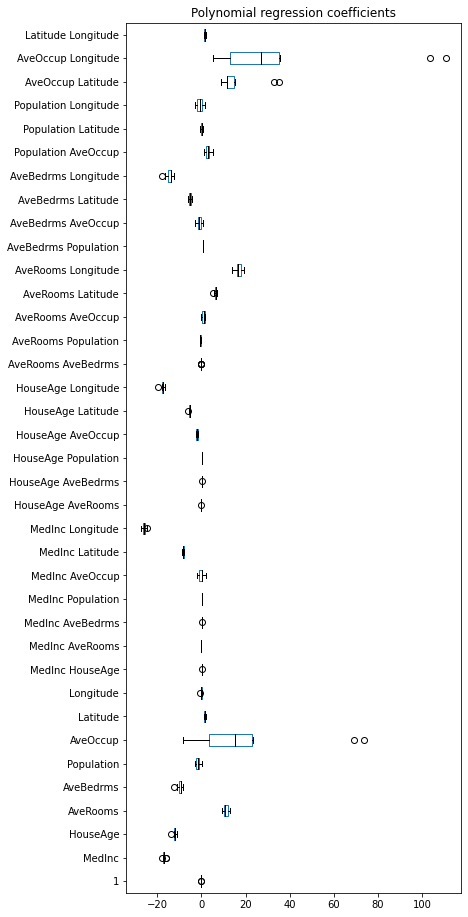

In [ ]:
color = {'whiskers':'black', 'medians':'black', 'caps':'black'}
weights_poly_reg.plot.box(color=color, vert=False, figsize=(6,16))
plt.title('Polynomial regression coefficients');

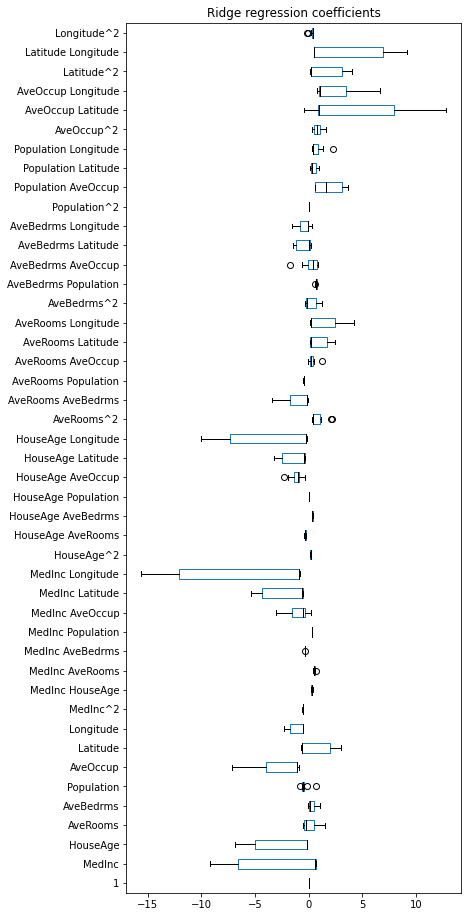

In [ ]:
#print(poly_reg_cv_results['estimator'])
feature_names = ridgecv_cv_results['estimator'][0][0].get_feature_names_out(input_features=train_features.columns)
coefs = [est[-1].coef_ for est in ridgecv_cv_results['estimator']]
weights_ridge_reg = pd.DataFrame(coefs, columns=feature_names)
color = {'whiskers':'black', 'medians':'black', 'caps':'black'}
weights_ridge_reg.plot.box(color=color, vert=False, figsize=(6,16))
plt.title('Ridge regression coefficients');

#Performance on the test set

##Baseline

In [ ]:
baseline_model_median = DummyRegressor(strategy='median')
baseline_model_median.fit(train_features, train_labels)
mean_absolute_percentage_error(test_labels, baseline_model_median.predict(test_features))

0.5348927548151625

##Linear Regression with Normal Equation

In [ ]:
mean_absolute_percentage_error(test_labels, lin_reg_cv_results['estimator'][0].predict(test_features))

0.32120472175482906

In [ ]:
mean_absolute_percentage_error(test_labels, poly_sgd_random_search.best_estimator_.predict(test_features))

0.31916692241957345

##Polynomial Regression

In [ ]:
poly_reg_pipeline.fit(com_train_features, com_train_labels)
mean_absolute_percentage_error(test_labels, poly_reg_pipeline.predict(test_features))

0.28199759082657233

##Ridge Regression

In [ ]:
mean_absolute_percentage_error(test_labels, ridge_grid_search.best_estimator_.predict(test_features))

0.2711033645141509

##Lasso Regression

In [ ]:
mean_absolute_percentage_error(test_labels, lasso_grid_search.best_estimator_.predict(test_features))

AttributeError: ignored